In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_year5= pd.read_excel('5__year.xlsx')

In [ ]:
df_year5

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [ ]:
# Converted all features to numeric (invalid strings become NaN)
# Excluded the target column from this step
feature_cols = df_year5.columns[:-1]  # assuming last column is 'class'
df_year5[feature_cols] = df_year5[feature_cols].apply(pd.to_numeric, errors='coerce')

#  Clean the target column: convert from bytes (e.g., b'0') to integer
df_year5['class'] = df_year5['class'].astype(str).str.extract(r'(\d)').astype(int)

In [ ]:
# Separated features and target
X = df_year5.iloc[:, :-1]  # first 64 columns (financial features)
y = df_year5.iloc[:, -1]   # last column ('class')

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
import shap


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_lr = []
cm_lr=[]
roc_lr = {}
shap_values_lr = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (bankrupt)


        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_lr.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_lr[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_lr = pd.DataFrame(results_lr)

# Round for readability
results_df_lr = results_df_lr.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.9061,0.3670,0.4878,0.9373,0.4188,0.8156
1,BorderlineSMOTE,0.9002,0.3500,0.5122,0.9291,0.4158,0.8001
2,ADASYN,0.8942,0.3383,0.5488,0.9200,0.4186,0.8092
3,SVMSMOTE,0.8993,0.3445,0.5000,0.9291,0.4080,0.8039
4,SMOTEENN,0.8917,0.3380,0.5854,0.9145,0.4286,0.8247
5,SMOTETomek,0.9052,0.3636,0.4878,0.9364,0.4167,0.8048


SMOTE


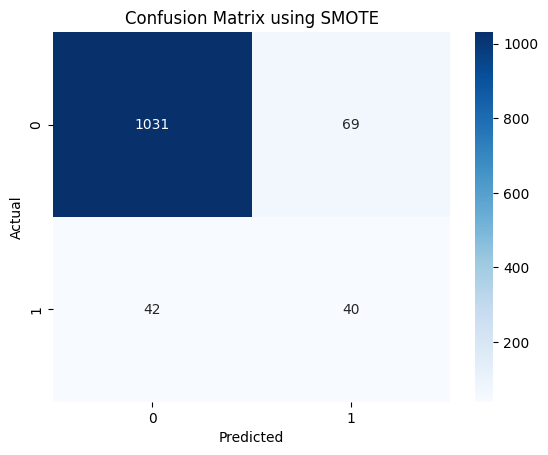

BorderlineSMOTE


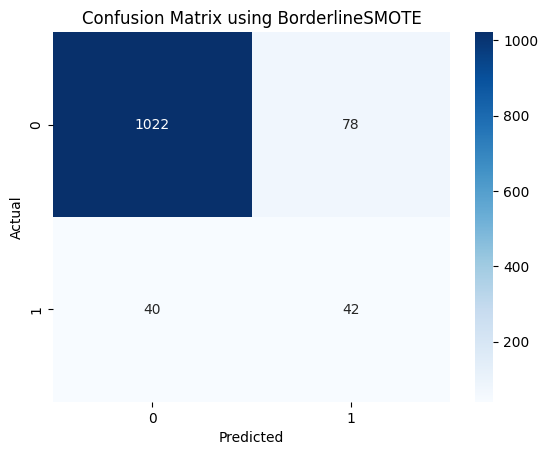

ADASYN


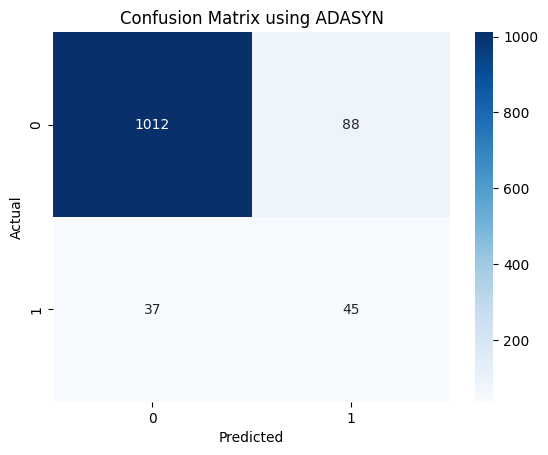

SVMSMOTE


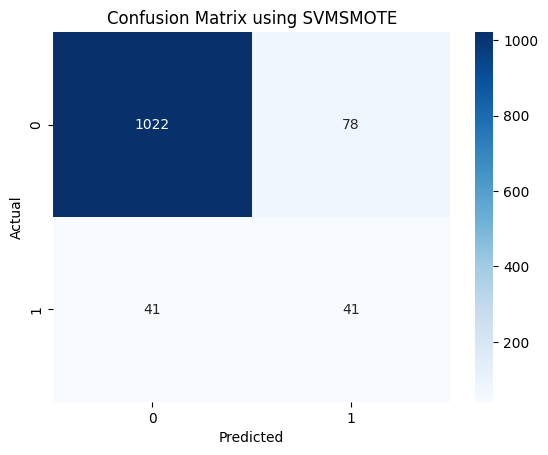

SMOTEENN


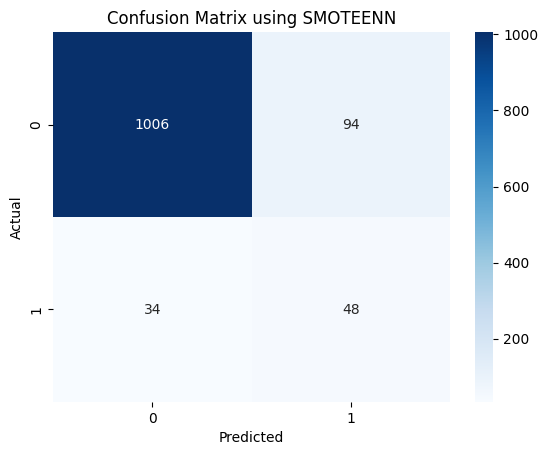

SMOTETomek


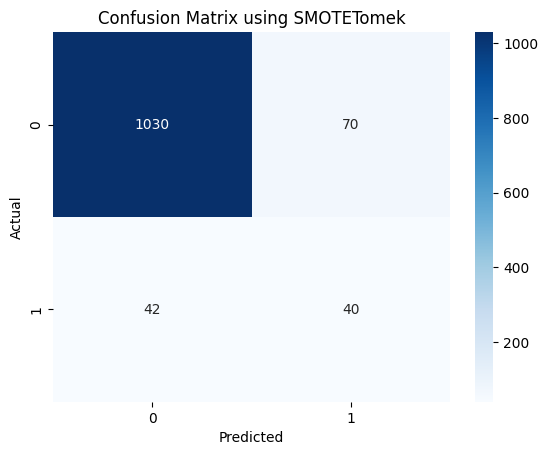

In [ ]:
#confusion matrix plot
for x in cm_lr:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

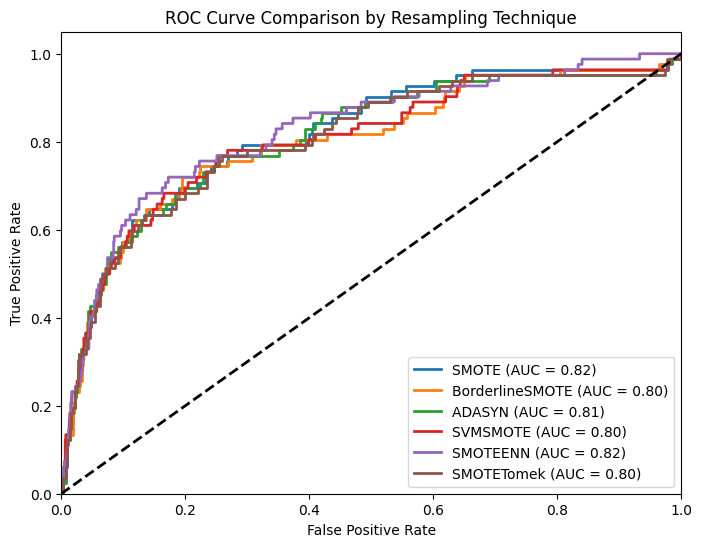

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_lr.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_svm = []
cm_svm=[]
roc_svm = {}
shap_values_svm = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', SVC(class_weight='balanced', kernel='rbf', C=.1, probability=True, random_state=42))])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]



        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_svm.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_svm.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_svm[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))


        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_svm = pd.DataFrame(results_svm)

# Round for readability
results_df_svm = results_df_svm.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_svm)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8147,0.2227,0.6707,0.8255,0.3343,0.8292
1,BorderlineSMOTE,0.8291,0.2391,0.6707,0.8409,0.3526,0.8362
2,ADASYN,0.7919,0.2071,0.7073,0.7982,0.3204,0.8267
3,SVMSMOTE,0.9010,0.3504,0.5000,0.9309,0.4121,0.8314
4,SMOTEENN,0.7953,0.2080,0.6951,0.8027,0.3202,0.8295
5,SMOTETomek,0.8147,0.2227,0.6707,0.8255,0.3343,0.8292


SMOTE


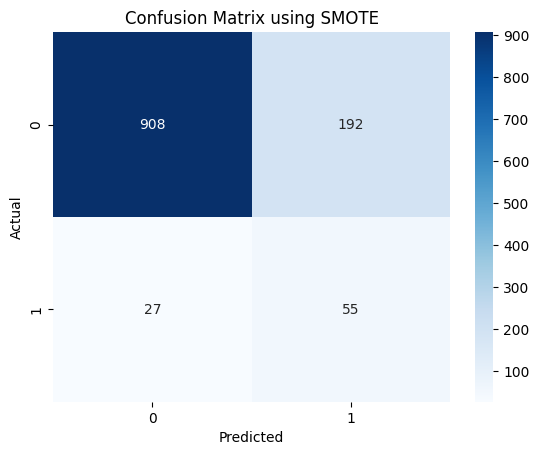

BorderlineSMOTE


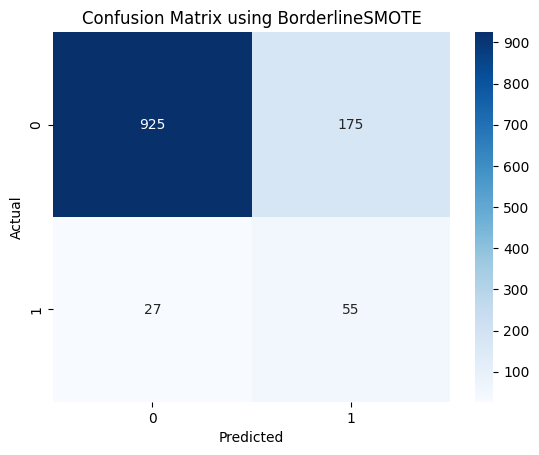

ADASYN


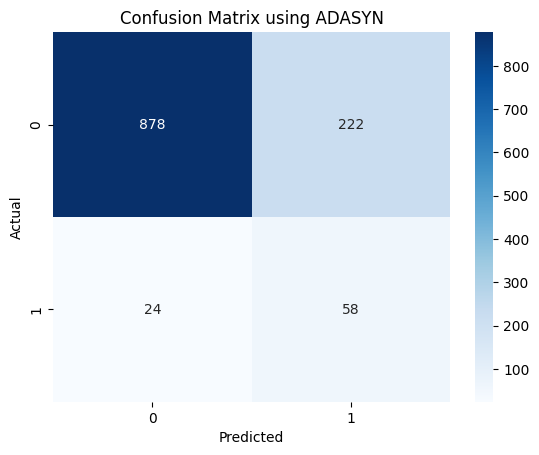

SVMSMOTE


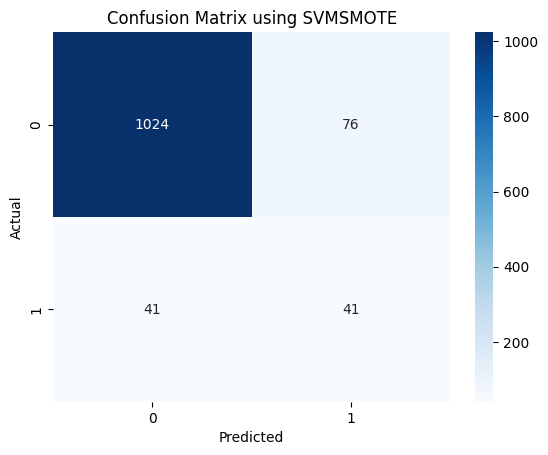

SMOTEENN


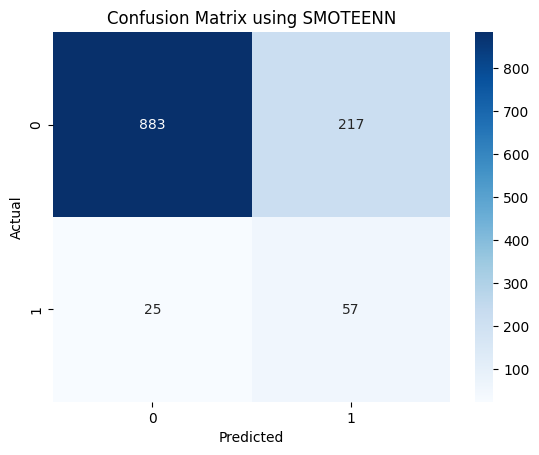

SMOTETomek


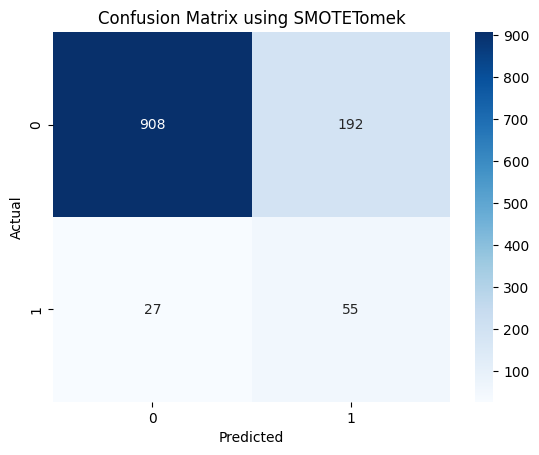

In [ ]:
#confusion matrix plot
for x in cm_svm:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

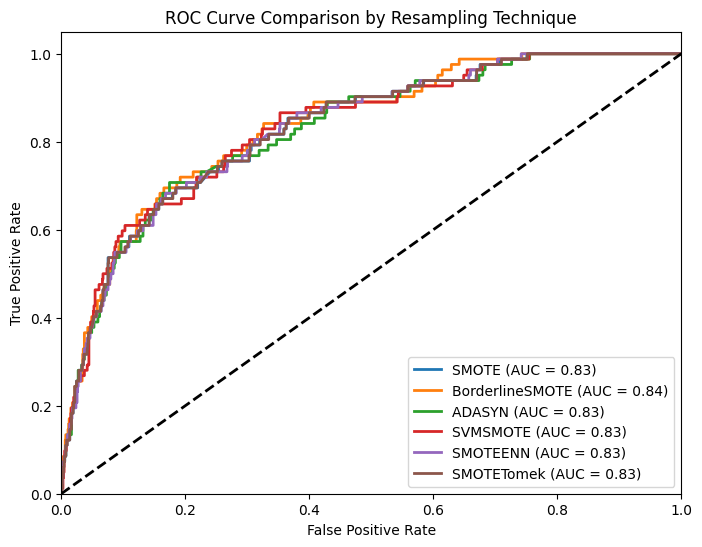

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_svm.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_rf = []
cm_rf=[]
roc_rf = {}
shap_values_rf = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.3).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_rf.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Round for readability
results_df_rf = results_df_rf.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8621,0.3043,0.7683,0.8691,0.4360,0.9037
1,BorderlineSMOTE,0.8689,0.3027,0.6829,0.8827,0.4195,0.8901
2,ADASYN,0.8613,0.3029,0.7683,0.8682,0.4345,0.8933
3,SVMSMOTE,0.8832,0.3353,0.6951,0.8973,0.4524,0.8938
4,SMOTEENN,0.7868,0.2222,0.8293,0.7836,0.3505,0.8922
5,SMOTETomek,0.8511,0.2804,0.7317,0.8600,0.4054,0.8993


SMOTE


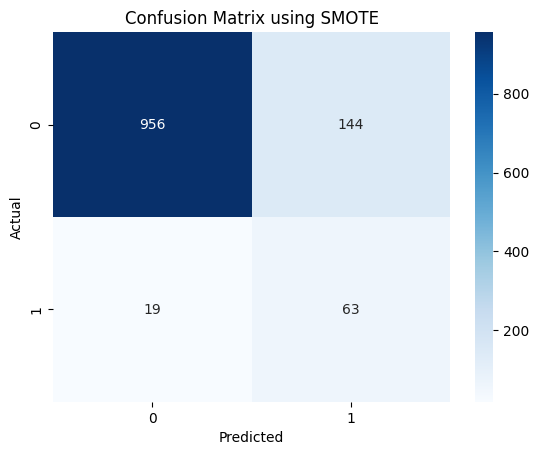

BorderlineSMOTE


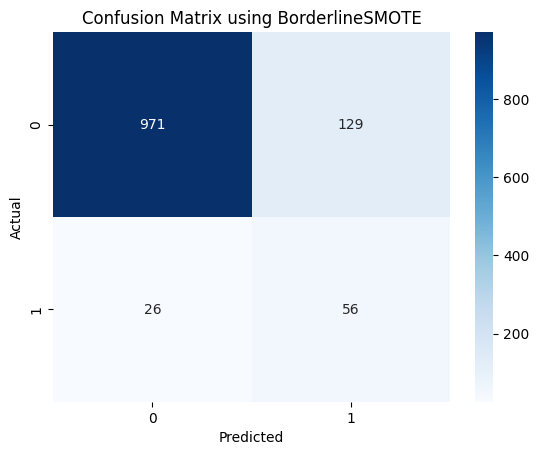

ADASYN


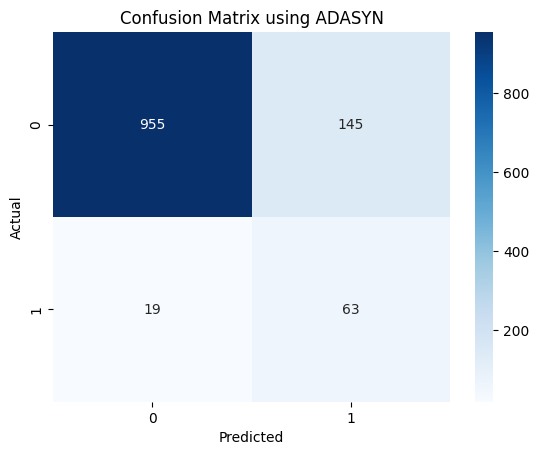

SVMSMOTE


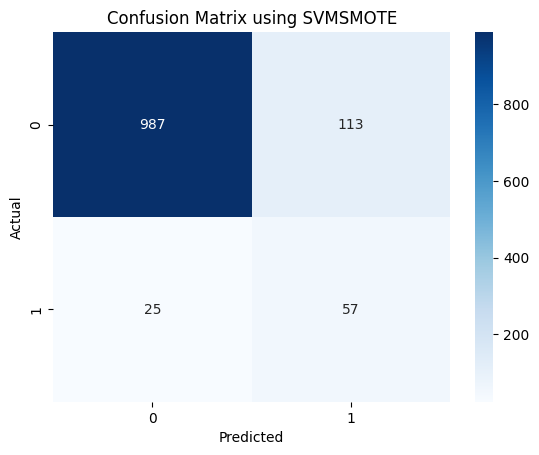

SMOTEENN


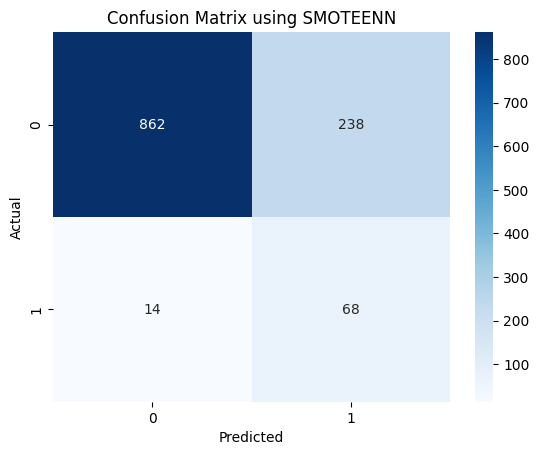

SMOTETomek


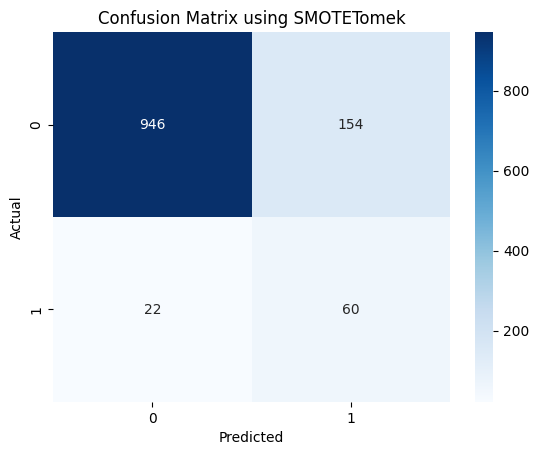

In [ ]:
#confusion matrix plot
for x in cm_rf:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

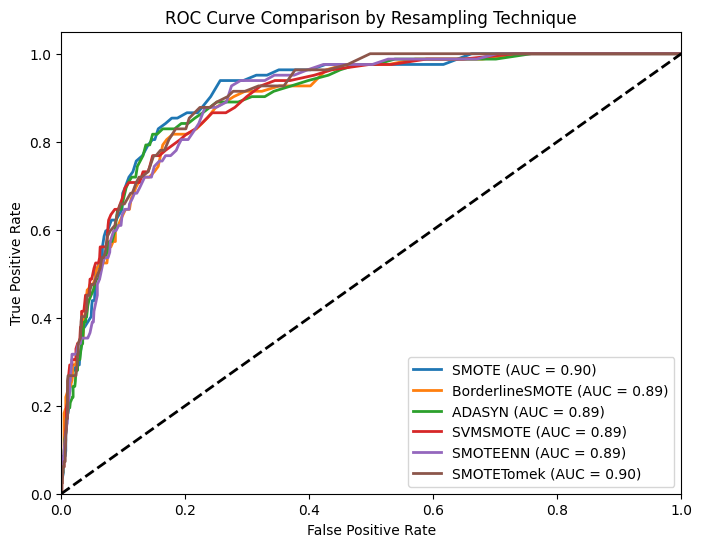

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_xgb = []
cm_xgb=[]
roc_xgb = {}
shap_values_xgb = []


for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:

        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = XGBClassifier(eval_metric='logloss',
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.1).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_xgb.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_xgb.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")



Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_xgb = pd.DataFrame(results_xgb)

# Round for readability
results_df_xgb = results_df_xgb.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.7637,0.2239,0.9219,0.7514,0.3603,0.9241
1,BorderlineSMOTE,0.7941,0.2463,0.8984,0.7860,0.3866,0.9194
2,ADASYN,0.7434,0.2096,0.9219,0.7295,0.3415,0.9296
3,SVMSMOTE,0.8229,0.2754,0.8906,0.8176,0.4207,0.9306
4,SMOTEENN,0.7140,0.1948,0.9453,0.6960,0.3231,0.9270
5,SMOTETomek,0.7462,0.2094,0.9062,0.7337,0.3402,0.9222


SMOTE


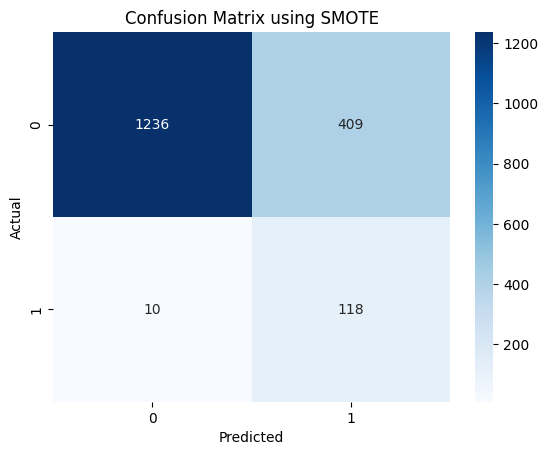

BorderlineSMOTE


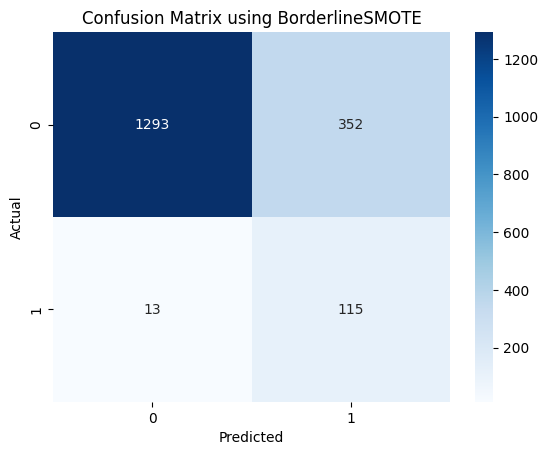

ADASYN


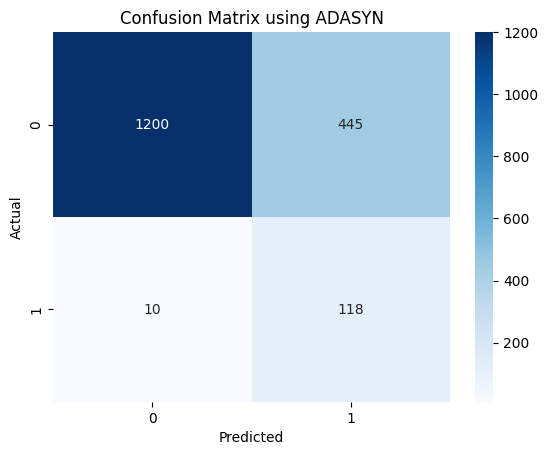

SVMSMOTE


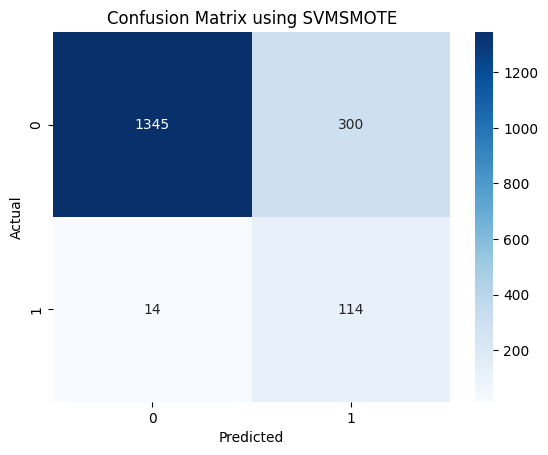

SMOTEENN


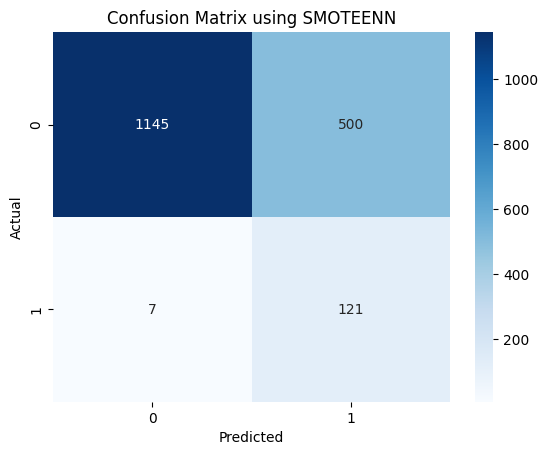

SMOTETomek


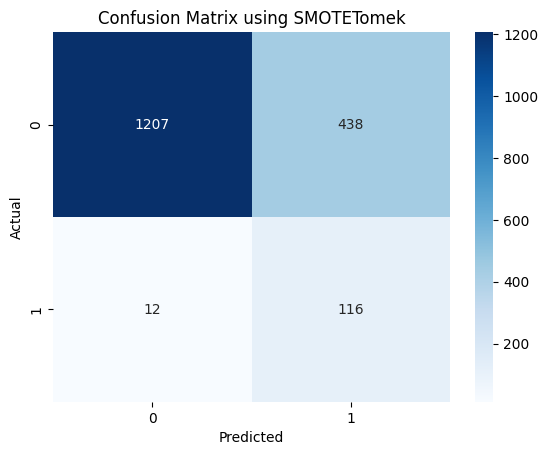

In [ ]:
#confusion matrix plot
for x in cm_xgb:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

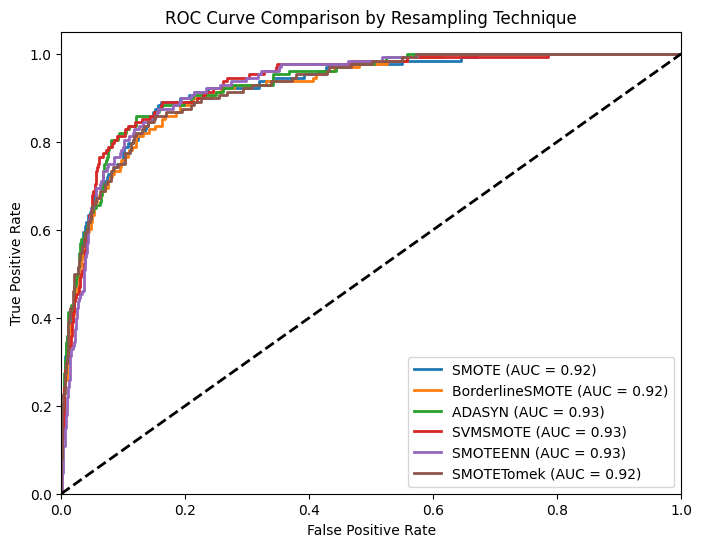

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

SMOTE


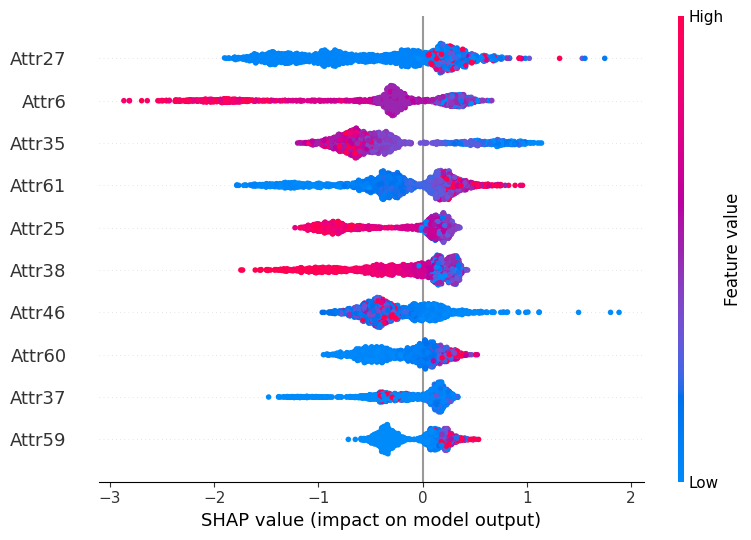

BorderlineSMOTE


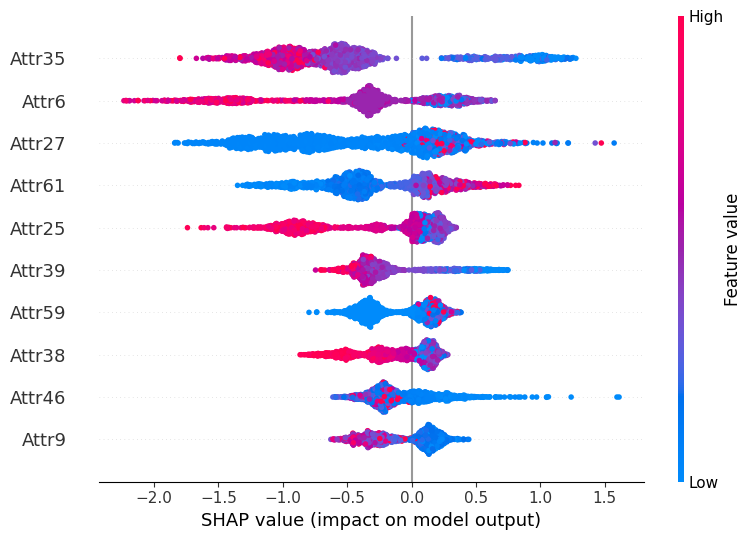

ADASYN


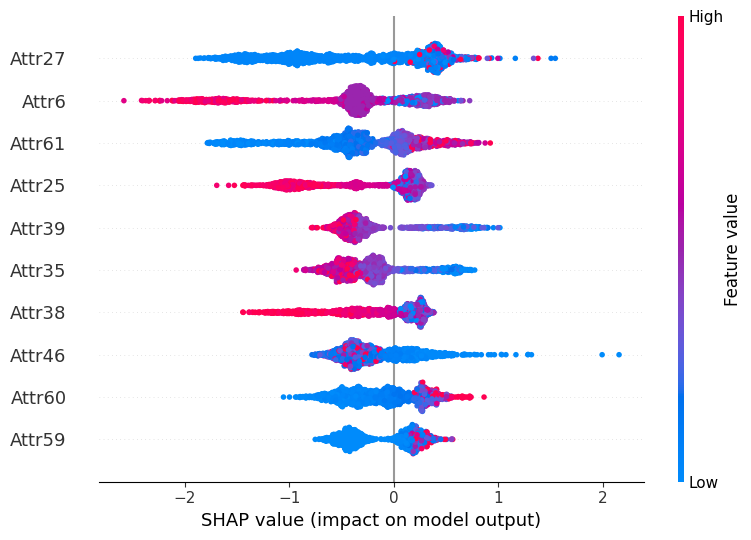

SVMSMOTE


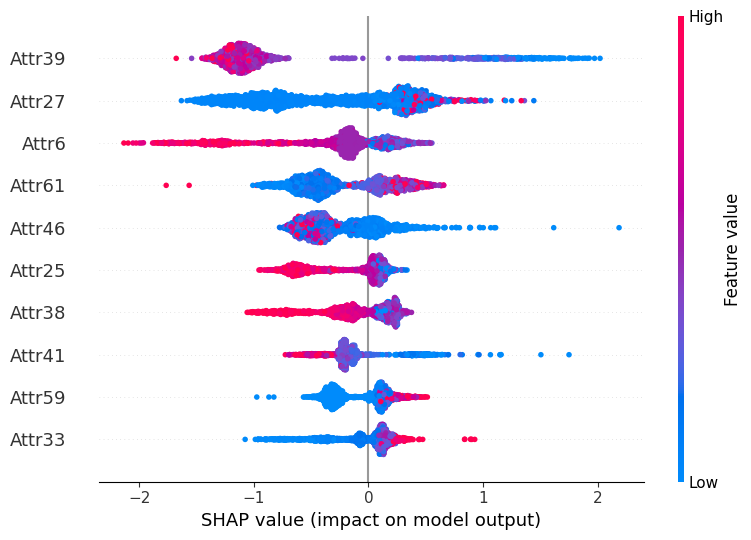

SMOTEENN


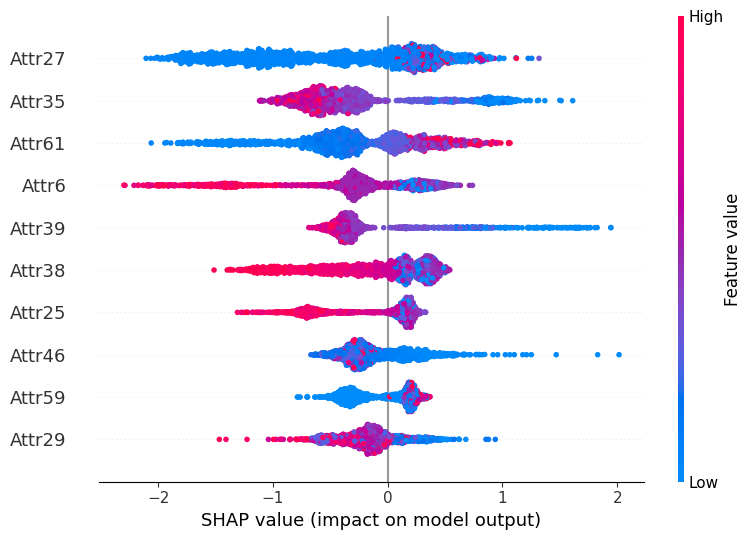

SMOTETomek


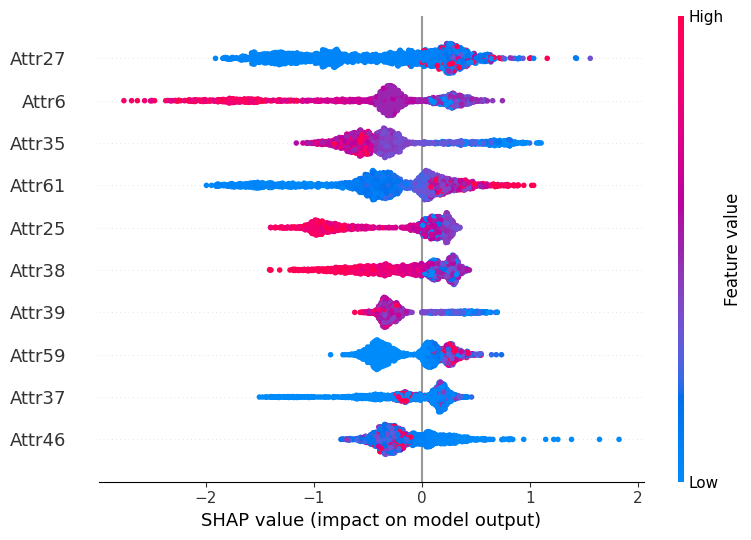

In [ ]:
for x in shap_values_xgb:
    for k in x:
        print(k)
    shap.summary_plot(x[k], X_test, max_display=10)



**ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_ann = []
cm_ann=[]
roc_ann = {}
shap_values_ann = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

        model = Sequential([
              Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
              BatchNormalization(),
              Dropout(0.5),
              Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Dropout(0.3),
              Dense(1, activation='sigmoid')])

        bankrupt_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)
        model.compile(
             optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['Recall', 'Precision'])


        y_prob = model.predict(X_test_scaled).flatten()
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_ann.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_ann.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_ann[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")


Using SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTE completed

Using BorderlineSMOTE...
 1/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ BorderlineSMOTE completed

Using ADASYN...
 1/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ ADASYN completed

Using SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ SVMSMOTE completed

Using SMOTEENN...
 1/37 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTEENN completed

Using SMOTETomek...
 1/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_ann = pd.DataFrame(results_ann)

# Round for readability
results_df_ann = results_df_ann.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_ann)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8790,0.1919,0.2317,0.9273,0.2099,0.5843
1,BorderlineSMOTE,0.0694,0.0694,1.0000,0.0000,0.1297,0.4227
2,ADASYN,0.8680,0.2016,0.3049,0.9100,0.2427,0.6017
3,SVMSMOTE,0.0694,0.0694,1.0000,0.0000,0.1297,0.4557
4,SMOTEENN,0.8993,0.1864,0.1341,0.9564,0.1560,0.3782
5,SMOTETomek,0.8968,0.2368,0.2195,0.9473,0.2278,0.4799


SMOTE


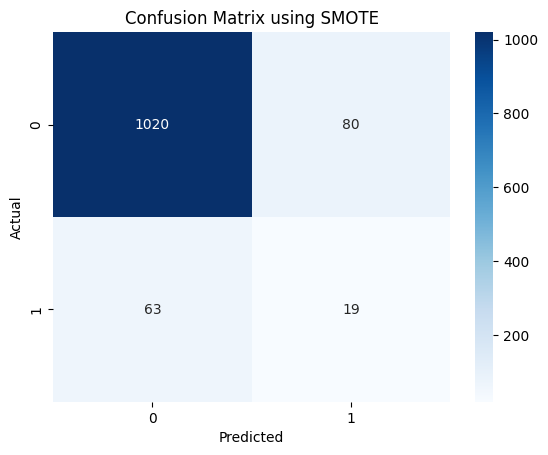

BorderlineSMOTE


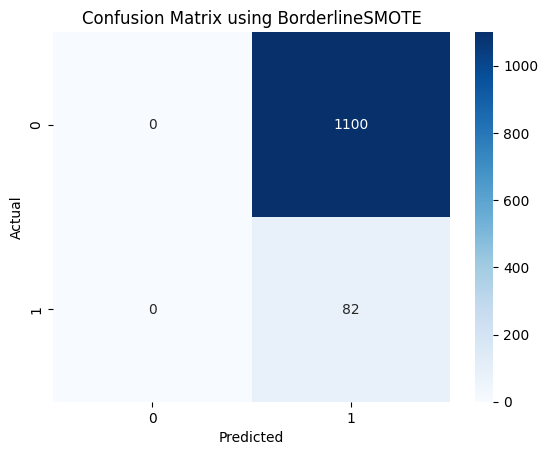

ADASYN


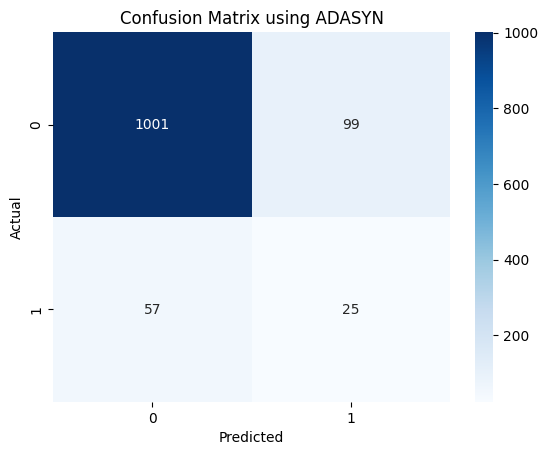

SVMSMOTE


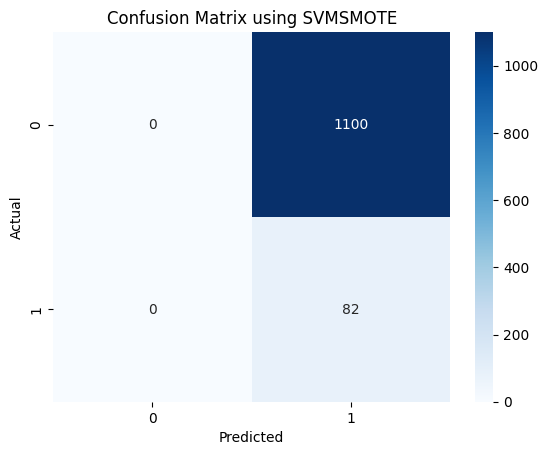

SMOTEENN


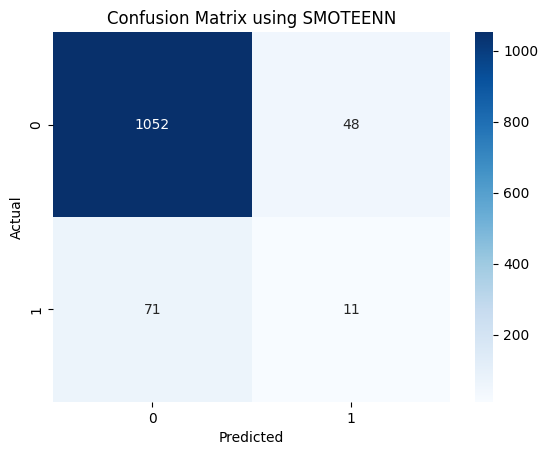

SMOTETomek


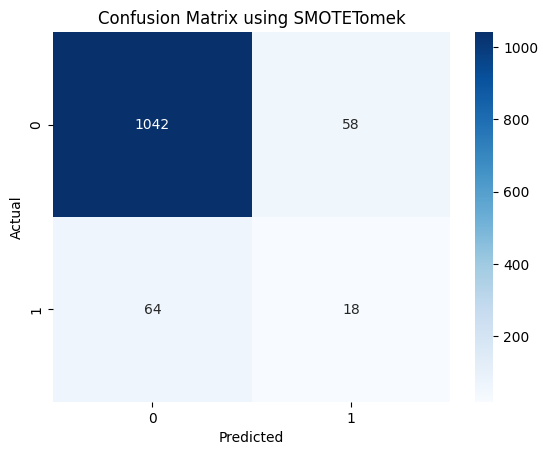

In [ ]:
#confusion matrix plot
for x in cm_ann:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

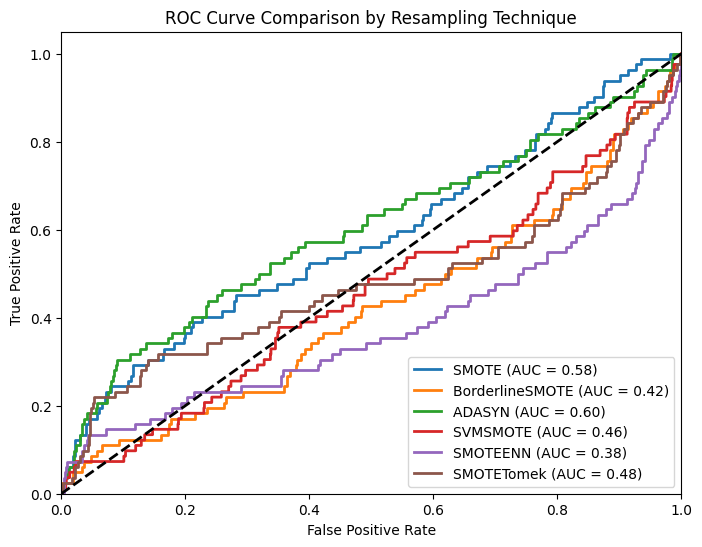

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_ann.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**MLP (6 Layers)**

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_mlp = []
cm_mlp=[]
roc_mlp = {}
shap_values_mlp = []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X1_resampled, y1_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Define a 6-layer MLP
        model = Sequential([
            Dense(128, activation='relu', input_dim=X1_resampled.shape[1]),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X1_resampled, y1_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_mlp.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_mlp.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_mlp[name] = (fpr, tpr, roc_auc_score(y_test, y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_mlp.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Create DataFrame
results_df_mlp= pd.DataFrame(results_mlp)

# Round for readability
results_df_mlp = results_df_mlp.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_mlp)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8875,0.2927,0.4390,0.9209,0.3512,0.7535
1,BorderlineSMOTE,0.8790,0.2953,0.5366,0.9045,0.3810,0.7835
2,ADASYN,0.8723,0.2406,0.3902,0.9082,0.2977,0.7330
3,SVMSMOTE,0.8883,0.3214,0.5488,0.9136,0.4054,0.8123
4,SMOTEENN,0.8596,0.2692,0.5976,0.8791,0.3712,0.8131
5,SMOTETomek,0.8765,0.2576,0.4146,0.9109,0.3178,0.7547


SMOTE


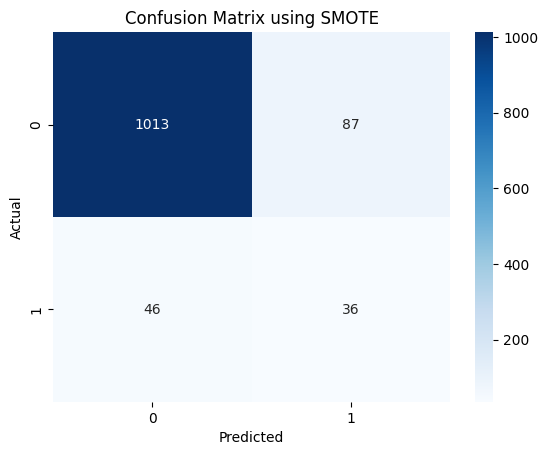

BorderlineSMOTE


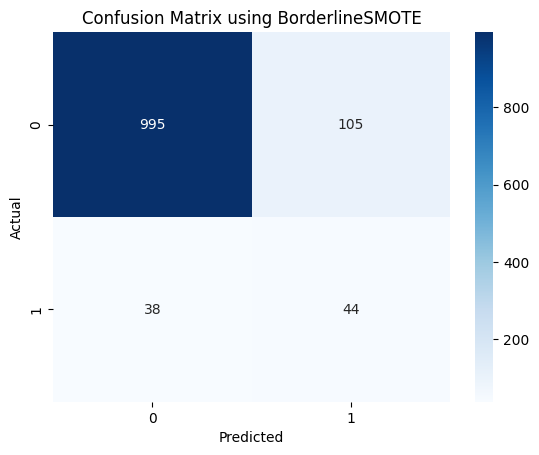

ADASYN


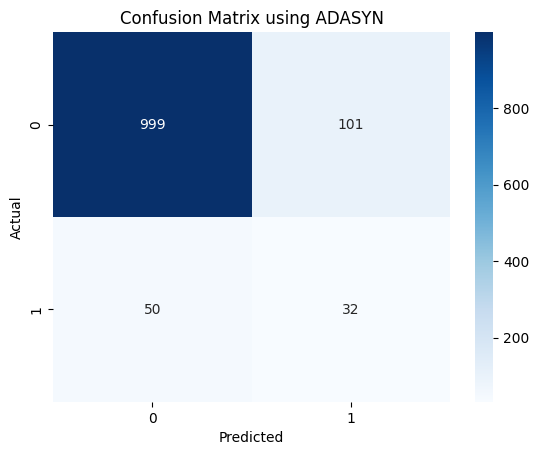

SVMSMOTE


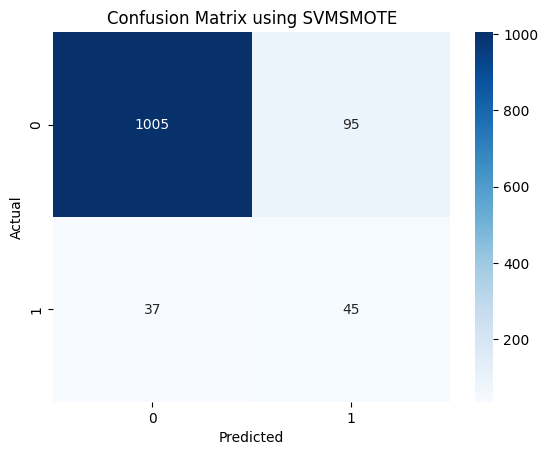

SMOTEENN


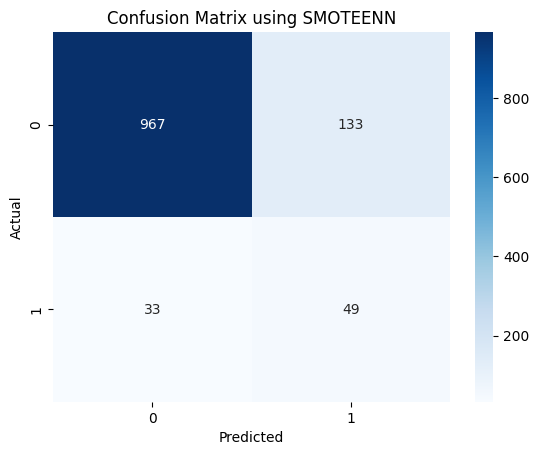

SMOTETomek


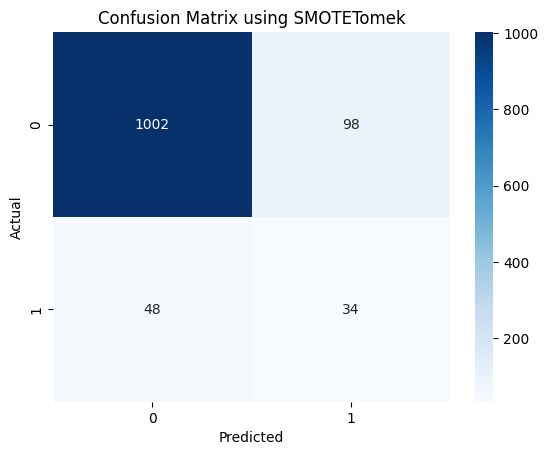

In [ ]:
#confusion matrix plot
for x in cm_mlp:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

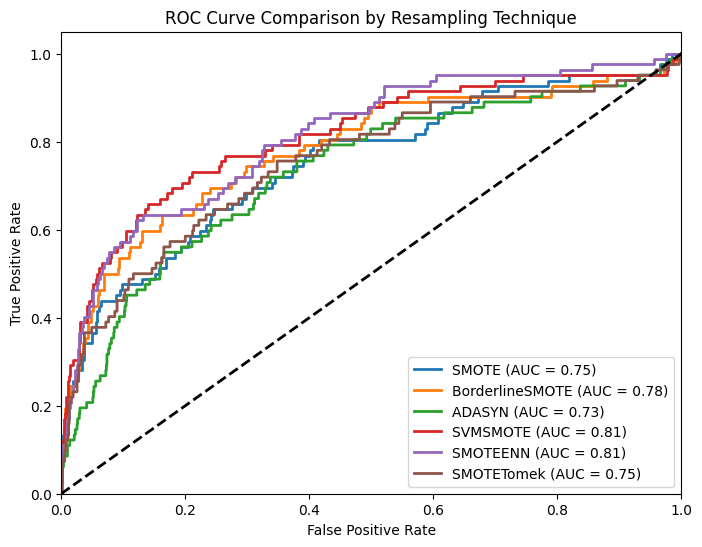

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_mlp.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn = []
cm_cnn=[]
roc_cnn = {}
shap_values_cnn = []


for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # 1D CNN
        model = Sequential([
              Conv1D(filters=64, kernel_size=3, activation='relu',
                     input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.4),

                     Conv1D(filters=128, kernel_size=2, activation='relu'),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.3),

                     Flatten(),

                     Dense(64, activation='relu'),
                     BatchNormalization(),
                     Dropout(0.3),

                    Dense(1, activation='sigmoid')])

        model.compile( optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['Recall', 'Precision'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_resampled, y_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_cnn.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
        roc_cnn[name] = (fpr, tpr, roc_auc_score(y_test,  y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_cnn.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
# Create DataFrame
results_df_cnn= pd.DataFrame(results_cnn)

# Round for readability
results_df_cnn = results_df_cnn.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6024,0.1284,0.8171,0.5864,0.2219,0.7838
1,BorderlineSMOTE,0.7953,0.2015,0.6585,0.8055,0.3086,0.8273
2,ADASYN,0.5364,0.1130,0.8293,0.5145,0.1988,0.7610
3,SVMSMOTE,0.8376,0.2454,0.6463,0.8518,0.3557,0.8187
4,SMOTEENN,0.7437,0.1778,0.7439,0.7436,0.2871,0.8354
5,SMOTETomek,0.7403,0.1720,0.7195,0.7418,0.2776,0.8176


SMOTE


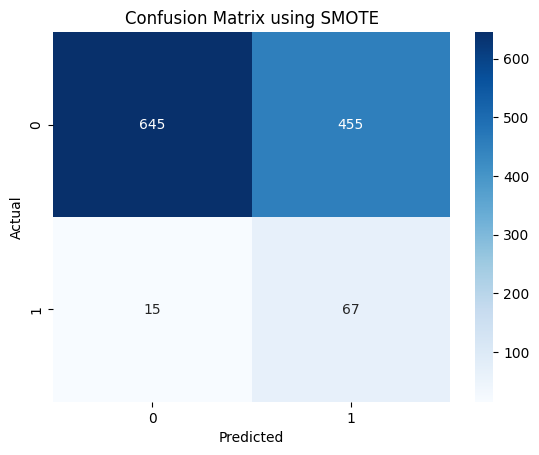

BorderlineSMOTE


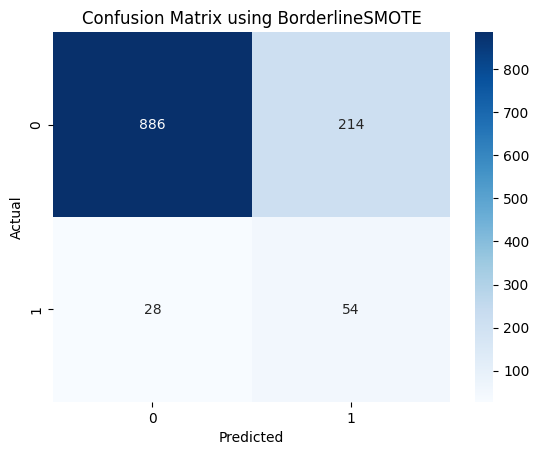

ADASYN


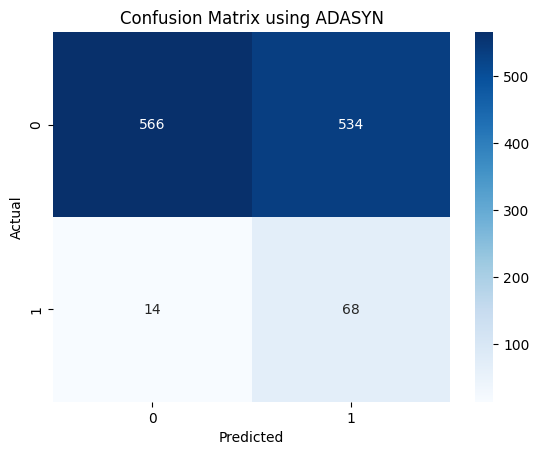

SVMSMOTE


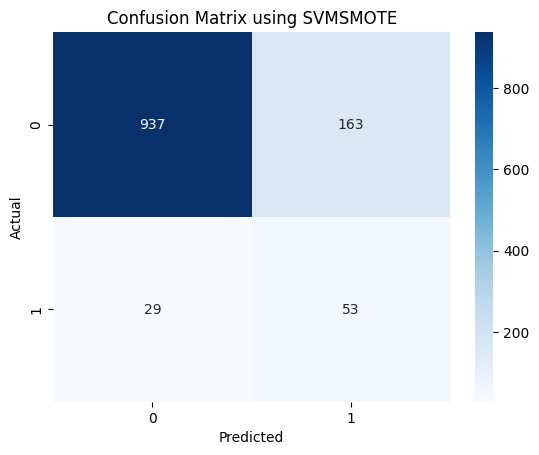

SMOTEENN


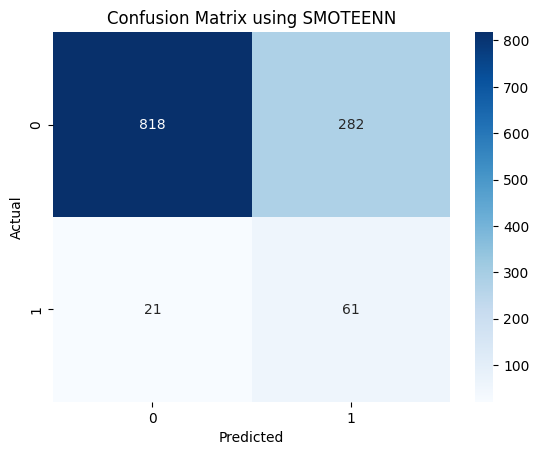

SMOTETomek


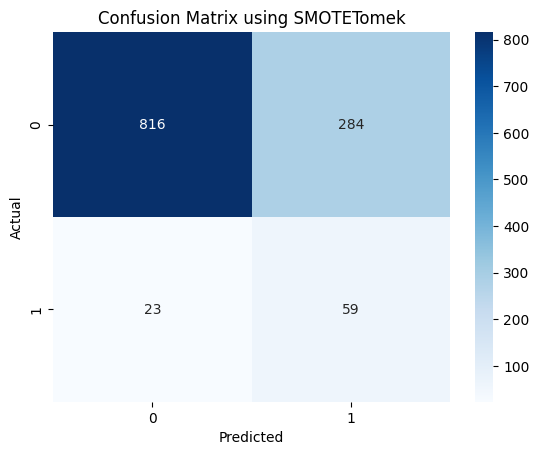

In [ ]:
#confusion matrix plot
for x in cm_cnn:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

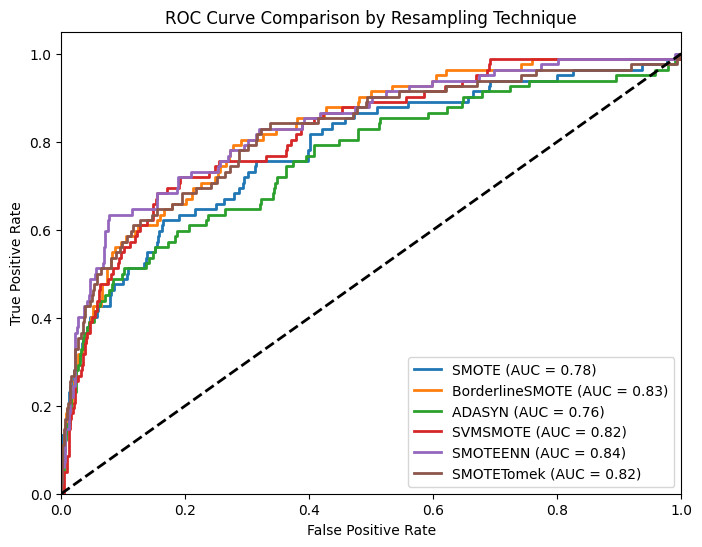

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_cnn.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()